In [8]:
#Check output directory
output_dir_prefix = "."

In [2]:

# Define the x locations for the groups
filename_type_dict = {'wav2vec2-base-960h' : 'Wav2vec2', 'bert-base-cased': 'BERT',
                      'mobilenet': 'mobile', 'mobilenet_v2_1.0_224' : 'mobile','vit' : 'ViT', 
                      'vit_h_14' : 'ViT', 'whisper-large-v2': 'Whisper', 'vit-base-patch16-224' : "ViT",
                      'albert-base-v2' : 'ALBERT'}
eight_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
key_color_dict = {'_Threads': 'r', '_Compute (SM) Throughput': 'c', '_DRAM Throughput': 'm', '_Memory Throughput': 'y', 
                  '_Registers': 'pink', 'exclusive_throughput': 'maroon', 'sm%': 'y', 'mem%': 'green', 'memcap': '#82cbec', 
                  'ground truth': 'b', 'random': 'orange', 'prediction': 'black', 'KACE': 'black','KACE_LR': 'black' ,
                  'hotcloud_RF': 'r', 'hotcloud': 'r', 'Xu et al.':'r', 'best_rule_based_value': 'gray', 'ground_truth value': 'b', "NN": "c", "RF": "m", "AutoML": "r",
                 }
label_model_dict = {'ground truth': 'Oracle', 'KACE': 'KACE_LR', 'hotcloud': 'Xu et al.', 'best_rule_based_value': 'Best rule based', 'sm%': 'SM%', 'mem%': 'MEM%', 'memcap': 'MEMCAP', 'random': 'Random', 'NN': 'KACE_NN', 'RF': 'KACE_RF', 'AutoML': 'KACE_AutoML', 'exclusive_throughput':'exclusive_throughput'}
def shorten_label(label):
    for key, value in filename_type_dict.items():
        if key in label:
            #split the label by '-' in last occurence
            batch_type = label.rsplit('_', 1)[1]
            print(label.rsplit('_', 1)[0])
            batch_type = batch_type.replace('batch', 'b')
            #print(label.rsplit('_', 1))
            #capitalize the first letter
            #value = value.capitalize()
            return value+ '_' + batch_type
    return label


#cp_keys = ['ground truth', 'KACE', 'hotcloud_RF', 'best_rule_based_value', 'sm%','mem%', 'memcap', 'random']
#base - KACE not included
all_models = ["NN", "RF", "AutoML"]
cp_keys = list(set(['ground truth', 'KACE', 'sm%','mem%', 'memcap', 'best_rule_based_value']).union(set(all_models)))
#occurences - to dataset % 
n_total_dataset = 181
n_train_dataset = [29, 43, 54, 65, 76,88,97,108,119]
n_train_dataset_perct = [100*x/n_total_dataset for x in n_train_dataset]
print(n_train_dataset_perct)
from matplotlib import pyplot as plt
label_font = 17
axis_font = 16
legend_font = 14


#plt.rcParams["font.family"] = "Ariel"

[16.022099447513813, 23.756906077348066, 29.834254143646408, 35.91160220994475, 41.988950276243095, 48.61878453038674, 53.591160220994475, 59.668508287292816, 65.74585635359117]


In [26]:
#helper functions
from datetime import datetime, timedelta

#find best rule based method for each model 
def find_best_rule_base(my_predicts):
    rule_based_col = ['random', 'sm%','memcap', 'mem%']
    print(my_predicts[rule_based_col])
    best_rule_based = my_predicts[rule_based_col].idxmax(axis=1)
    #my_predicts['best_rule_based'] = best_rule_based
    #store value of best rule based in a new column
    #my_predicts['best_rule_based_value'] = my_predicts.lookup(my_predicts.index, best_rule_based)
    
    # Update 'best_rule_based_value' to get the corresponding values for the max columns
    my_predicts['best_rule_based_value'] = my_predicts.apply(lambda row: row[rule_based_col].max(), axis=1)
    #my_predicts['best_rule_based'] 
    my_predicts['best_rule_based_value']

def parse_training_time(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if "Training time" in line:
                time_str = file.readline().strip()
                time_parts = time_str.split(':')
                # Extract hours, minutes, seconds and microseconds
                hours = int(time_parts[0])
                minutes = int(time_parts[1])
                seconds, microseconds = map(float, time_parts[2].split('.'))
                total_seconds = timedelta(hours=hours, minutes=minutes, seconds=seconds, microseconds=microseconds).total_seconds()
                return total_seconds

# Example usage

occurences:  2
occurences:  3
occurences:  4
occurences:  5
occurences:  6
occurences:  7
occurences:  8
occurences:  9
occurences:  10
defaultdict(<class 'list'>, {'KACE': [0.20352756584907028, 0.1442320997141905, 0.1457826723698554, 0.1401990566654722, 0.139751122293082, 0.12673881553491925, 0.12675751130057686, 0.12303156653696663, 0.12961560659249888], 'NN': [0.24006293615426477, 0.1428440443100083, 0.126548492848088, 0.11839353492372902, 0.12299519679993327, 0.10646544627428711, 0.09758381027567717, 0.08968936126280176, 0.09654916238297132], 'RF': [0.27856584298550907, 0.21670219156880455, 0.17971099956435077, 0.16425518554322577, 0.14723797030509858, 0.14937162491728345, 0.13165404686214696, 0.12466895501143074, 0.13904036454705362], 'AutoML': [0.16977892098406316, 0.12572287056736942, 0.1029120623065187, 0.08469375453964759, 0.08475717432738786, 0.07973829647986039, 0.06343127045639077, 0.06660121201509828, 0.05633139433809965]})


/tmp/ipykernel_21889/177008376.py:155: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax3.set_ylim(bottom=0)


defaultdict(<class 'list'>, {'KACE': [0.002461, 0.002127, 0.003219, 0.001674, 0.002051, 0.001778, 0.002461, 0.002546, 0.002118], 'NN': [10.1102776, 13.286971, 13.9274462, 8.6319634, 6.84769, 8.983281999999999, 9.2778214, 8.7358328, 11.0488424], 'RF': [126.00484199999998, 118.0332492, 98.0865004, 91.67033280000001, 92.7735938, 95.2259906, 116.55751640000001, 164.6463956, 142.86965179999999], 'AutoML': [61.350141400000005, 61.960328200000006, 62.3530712, 61.347992399999995, 61.222675, 61.33619699999999, 61.5902786, 61.484353999999996, 61.147346600000006]})


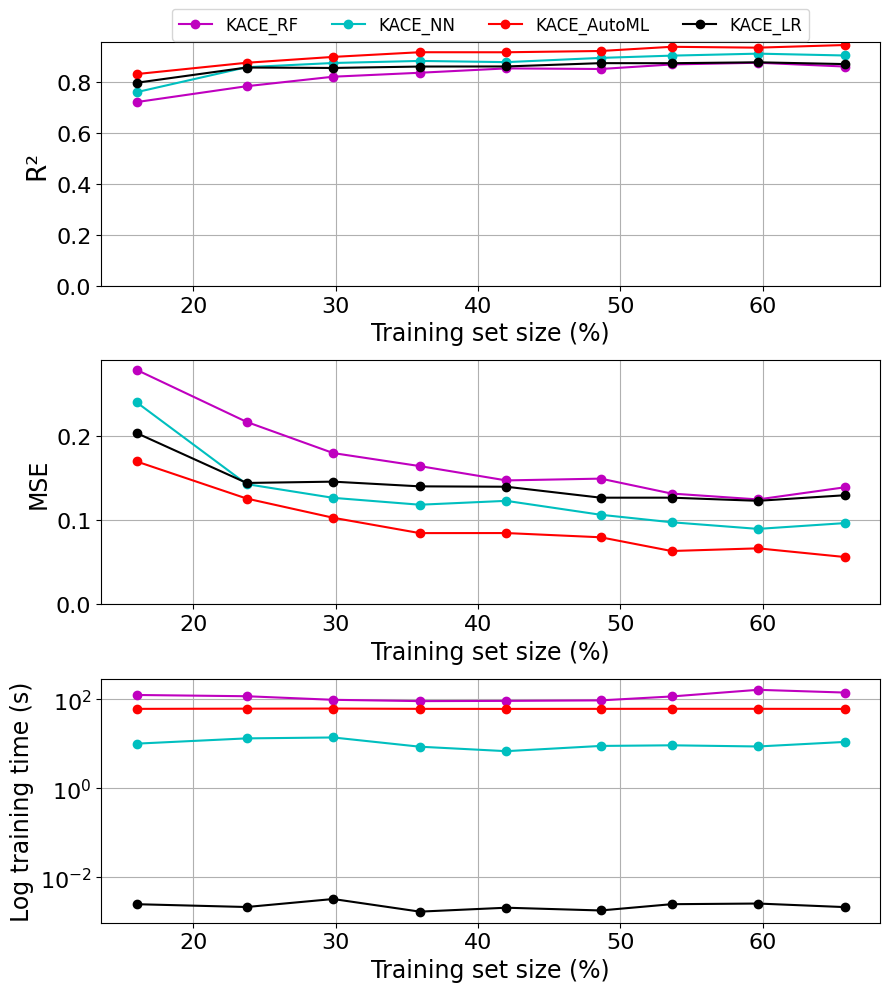

In [40]:
#Figure 2
import os
from collections import defaultdict

def get_all_accuracies(columns, runs, n_occur ,all_models, key_color_dict):
    
    dfs = []
    #all_model_types
    # Read each run into a dataframe and store in the list
    #remove "KACE" from all_models
    #all_models.remove("KACE")
    skip_run = False
    metrics = defaultdict(lambda: defaultdict(list))
    for run in runs:
        for model in all_models:
            #try to read the model. if not, skip
            #read all txt file in the folder with mse_r2 in the name

            for file in os.listdir(run+f"/{model}/predictAllpairs"):
                if "mse_r2" in file and "txt" in file:
                    file_path = run+f"/{model}/predictAllpairs/{file}"
                    
                    with open(file_path, 'r') as file:
                        for line in file:
                            if line.startswith("MSE:"):
                                mse_value = float(line.split(":")[1].strip())
                                metrics[model]['MSE'].append(mse_value)
                            elif line.startswith("R2:"):
                                r2_value = float(line.split(":")[1].strip())
                                metrics[model]['R2'].append(r2_value)
            for file in os.listdir(run+f"/{model}"):
                if "train_time" in file and "txt" in file:
                    #print(file)
                    file_path = run+f"/{model}/{file}"
                    training_time = parse_training_time(file_path)
                    #print(training_time)
                    metrics[model]['training_time'].append(training_time)
            #if not os.path.exists(run+f"/{model}/predicts/relative_throughput.csv"):
            #model_df = pd.read_csv(run+f"/{model}/predicts/relative_throughput.csv")
           
            #df["hotcloud_RF"] = hotcloud_df
        
    #count mean of metrics
    #only return mean of all models
    ret = defaultdict(lambda: defaultdict())
    for model in all_models:
        if len(metrics[model]['MSE']) == 0:
            metrics[model]['mean_MSE'] = -1
        else:
            metrics[model]['mean_MSE'] = sum(metrics[model]['MSE'])/len(metrics[model]['MSE']) 
        if len(metrics[model]['R2']) == 0:
            metrics[model]['mean_R2'] = -1
        else:
            metrics[model]['mean_R2'] = sum(metrics[model]['R2'])/len(metrics[model]['R2'])
        ret[model]['mean_MSE'] = metrics[model]['mean_MSE']
        ret[model]['mean_R2'] = metrics[model]['mean_R2']
        if len(metrics[model]['training_time']) == 0:
            ret[model]['mean_training_time'] = -1
        else:
            ret[model]['mean_training_time'] = sum(metrics[model]['training_time']) / len(metrics[model]['training_time'])


    return ret

def plot_mean_metrics(metrics, n_occurence):
    models = list(metrics.keys())
    mean_mse = [metrics[model]['mean_MSE'] for model in models]
    mean_r2 = [metrics[model]['mean_R2'] for model in models]

    bar_width = 0.35
    index = np.arange(len(models))

    fig, ax = plt.subplots(figsize=(12, 8))

    bars1 = ax.bar(index, mean_mse, bar_width, label='Mean MSE', color='b')
    bars2 = ax.bar(index + bar_width, mean_r2, bar_width, label='Mean R2', color='g')

    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title(f'Mean MSE and Mean R2 for Different Models - trained with {n_occurence} occurences')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()


def plot_acc_all_occurence(all_mean_acc, train_occurrences, key_color_dict, output_dir):
    assert(len(train_occurrences) == len(n_train_dataset_perct))
    
    models = list(all_mean_acc[0].keys())
    mean_mse_values = defaultdict(list)
    mean_r2_values = defaultdict(list)
    mean_training_time_values = defaultdict(list)

    for metrics in all_mean_acc:
        for model in models:
            mean_mse_values[model].append(metrics[model]['mean_MSE'])
            mean_r2_values[model].append(metrics[model]['mean_R2'])
            mean_training_time_values[model].append(metrics[model]['mean_training_time'])

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    enlarge = 1.9
    label_font = 17 
    axis_font = 16 
    legend_font = 15
    # Create individual figures
    fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(9, 10))
    #fig2, ax2 = plt.subplots(figsize=(8, 4.2))
    #fig3, ax3 = plt.subplots(figsize=(8, 4.2))

    legend_order = ['RF', 'NN', 'AutoML', 'KACE']
    for i, model in enumerate(legend_order):
        color = colors[i % len(colors)]
        ax1.plot(n_train_dataset_perct, mean_r2_values[model], label=f'{label_model_dict[model]}', marker='o', color=key_color_dict[model])
        ax2.plot(n_train_dataset_perct, mean_mse_values[model], label=f'{label_model_dict[model]}', marker='o', color=key_color_dict[model])
        ax3.plot(n_train_dataset_perct, mean_training_time_values[model], label=f'{label_model_dict[model]}', marker='o', color=key_color_dict[model])

    

    #ax2.set_xlabel('Training set size (%)', fontsize=label_font)
    ax1.set_ylabel('R²', fontsize=label_font+2)
    #set xtick font size
    ax1.tick_params(axis='x', labelsize=axis_font)
    ax1.tick_params(axis='y', labelsize=axis_font)
    #ax2.set_title('R² for Different Models Across Training Set Sizes', fontsize=9)
    ax1.legend(fontsize=legend_font-3, ncol=4, loc='upper center', bbox_to_anchor=(0.5,1.17))
    ax1.set_ylim(bottom=0)
    ax1.set_xlabel('Training set size (%)', fontsize=label_font)

    ax1.grid(True)

    #ax1.set_xlabel('Training set size (%)', fontsize=label_font)
    ax2.set_ylabel('MSE', fontsize=label_font)
    ax2.tick_params(axis='x', labelsize=axis_font)
    ax2.tick_params(axis='y', labelsize=axis_font)
    ax2.set_xlabel('Training set size (%)', fontsize=label_font)

    print(mean_mse_values)
    #add value of ax2 bars

    #ax2.legend(fontsize=legend_font)
    #start y axis from 0
    ax2.set_ylim(bottom=0)
    ax2.grid(True)

    ax3.set_xlabel('Training set size (%)', fontsize=label_font)
    ax3.set_ylabel('Log training time (s)', fontsize=label_font)
    ax3.set_yscale('log')
    ax3.tick_params(axis='x', labelsize=axis_font)
    ax3.tick_params(axis='y', labelsize=axis_font)
    #ax3.set_title('Training Time for Different Models Across Training Set Sizes', fontsize=9)
    #ax3.legend(fontsize=legend_font)
    ax3.set_ylim(bottom=0)
    ax3.grid(True)

    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    fig.tight_layout()
    fig.savefig(os.path.join(output_dir, 'Figure2: all_r2_mse_time_vs_training_set_size.png'))
    print(mean_training_time_values)
    # Save each figure separately
    

    


all_mean_acc = []
train_occurrences= [i for i in range(2,11)]
for n_occur in train_occurrences:
    runs = []
    for rd in range(10,51,10):
        #runs.append(f"/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/mlProfiler/output/rand_run_nosharedmem/rand{i}/relative_throughput.csv")
        runs.append(f"../output/run0709_KACE_hotcloud/n_occur_{n_occur}/rand{rd}")
        #runs.append(f"/Users/bing/Documents/mlProfiler/output/run0709_KACE_hotcloud/n_occur_{n_occur}/rand{rd}")
#plot average throughput of all
    all_counted_models = ["KACE","NN", "RF", "AutoML"]
    print("occurences: ", n_occur)
    mse_r2_metrics = get_all_accuracies(cp_keys, runs, n_occur ,all_counted_models, key_color_dict)
    #plot_mean_metrics(mse_r2_metrics, n_occur)
    #print(mean_of_approaches)
    all_mean_acc.append(mse_r2_metrics)
plot_acc_all_occurence(all_mean_acc, train_occurrences, key_color_dict, output_dir_prefix)

#print(mean_acc)
#plot_gain_all_occurences(gain_with_all_training_occurances, train_occurrences, key_color_dict)

In [34]:
#COLOCATION TESTS
#Figure 3,4 function defintion 
import numpy as np
import pandas as pd
axis_font = 23
legend_font = 17
def plot_gain_all_occurences(gain_with_all_training_occurences, occurrences, key_color_dict, key_legend_order, outname):
    #plot line chart with x axis to be occurences
    #gain_with_all_training_occurences = gain_with_all_training_occurences.to_dict()
    #print(gain_with_all_training_occurences)
    
    gains_dict = {col: [] for col in gain_with_all_training_occurences[0].keys() }

    # Fill the dictionary with the values from each run
    for run in gain_with_all_training_occurences:
        for col, gain in run.items():
            gains_dict[col].append(gain)
    #delete ground truth value
    if 'ground truth' in gains_dict:
        del gains_dict['ground truth']
    #del gains_dict['ground truth']
    
    # Plotting
    #occurrences = list(range(1, len(gain_with_all_training_occurrences) + 1))
    fig, ax = plt.subplots(figsize=(11, 6))
    if key_legend_order == None:
        key_legend_order = list(gains_dict.keys())
    
    for col in key_legend_order:
        gains = gains_dict[col]
        ax.plot(n_train_dataset_perct, gains, label=label_model_dict[col], color=key_color_dict.get(col, 'k'), marker='o')
        #print gains
        #for i, gain in enumerate(gains):
        #    ax.text(n_train_dataset_perct[i], 0.5*gain, f"{100*gain:.1f}%", fontsize=15, ha='center', va='bottom')
    
    ax.set_xlabel('Training set size (%)', fontsize=axis_font)
    ax.set_ylabel('Normalized throughput sum', fontsize=axis_font)
    #set y tick font size
    ax.tick_params(axis='y', labelsize=axis_font)
    ax.tick_params(axis='x', labelsize=axis_font)
    #y start with 0
    ax.set_ylim(bottom=0.3)
    #set ylim to 1
    ax.set_ylim(top=1.0)
    #ax.set_title('Throughput Gain for Each Model Across Tranning Set Sizes')
    ax.legend(fontsize=legend_font)
    ax.grid(alpha=0.5)
    plt.tight_layout()
    
    str_cp_keys = "".join(list(gain_with_all_training_occurences[0].keys() ))
    plt.savefig(f"{output_dir_prefix}/{outname}.png")
    plt.show()

def plot_average_throughput_multiple_runs(columns, runs, n_occur ,all_models, key_color_dict):
    # List to store each run as a dataframe
    axis_font = 20
    legend_font = 15
    label_font = 21
    dfs = []
    print("all models: ", all_models)
    print("columns: ", columns)
    #all_model_types
    # Read each run into a dataframe and store in the list
    #remove "KACE" from all_models
    #all_models.remove("KACE")
    skip_run = False
    for run in runs:
        df = pd.read_csv(run+"/KACE/predicts/relative_throughput.csv")
        df = df.rename(columns={"prediction": "KACE"})
        for model in all_models:
            
            #try to read the model. if not, skip
            try:
                #print(f"reading {model} in {run}")
                model_df = pd.read_csv(run+f"/{model}/predicts/relative_throughput.csv")
            except:
                print(f"model {model} not found in {run}")
                
                skip_run = True
                break
            #model_df = pd.read_csv(run+f"/{model}/predicts/relative_throughput.csv")
            df[f"{model}"] = model_df["prediction"]
            #df["hotcloud_RF"] = hotcloud_df
        if skip_run:
            skip_run = False
            continue
        find_best_rule_base(df)
        # Multiply every row by ground truth value
        #for col in columns:
        #    df[col] = df[col] * df['ground truth value']
        print(columns)
        dfs.append(df[columns])

    # Concatenate the dataframes along the rows to create a single dataframe
    concatenated_df = pd.concat(dfs, keys=range(len(dfs)), names=['Run', 'Index'])
    #print(concatenated_df)
    # Calculate the mean and standard deviation for each column
    means = concatenated_df.groupby(level='Run').mean().mean()
    stds = concatenated_df.groupby(level='Run').mean().std()
    
    #print("group by run mean\n",concatenated_df.groupby(level='Run').mean())

    print(f"means: {means}")
    print(f"stds: {stds}")
    
    # Sort means and stds accordingly
    #means = means.sort_values(ascending=False)
    #stds = stds[means.index]
    columns = means.index

    bar_width = 0.5
    
    # Plot bar chart
    fig, ax = plt.subplots(figsize=(15, 6))
    #ax.set_title(f'Average Throughput of Different Models with {int(n_train_dataset_perct[n_occur-2])}% training set size ')
    ax.set_ylabel('Normalized throughput sum', fontsize=axis_font)
    
    # X positions for bars
    x_pos = np.arange(len(columns))
    #bar_label 
    
    
        #create custome label_model_dict
    import copy
    baseline_label_model_dict = copy.deepcopy(label_model_dict)
        #change hotcloud to Xu et al.
    if "hotcloud" in columns:
        baseline_label_model_dict["KACE"] = "KACE"
    
    error_colors = {
    'ground truth': 'gray',
    'KACE': 'gray',  # Adjusted to be more noticeable on black bar
    'sm%': 'black', 
}
    # Plot bars with error bars
    
    for i, col in enumerate(columns):
        ax.bar(
            x_pos[i], means[col], yerr=stds[col], color=key_color_dict[col], 
            width=bar_width, capsize=5, error_kw=dict(ecolor=error_colors.get(col, 'black'), lw=2), 
            label=baseline_label_model_dict[col] 
        )
    
    # Set x-ticks and labels
    ax.set_xticks(x_pos)
    ax.set_xticklabels([baseline_label_model_dict[col] for col in columns], rotation=0, ha='center', fontsize=axis_font-3)
    #set y_tick font size
    ax.tick_params(axis='y', labelsize=axis_font)
    
    # Add text to each bar with average relative gain

    """
    for i in range(len(columns)):
        ax.text(i, 0.2, f"Gain:\n{(100*means[i]):.1f}%", 
                bbox=dict(facecolor='0.85'), fontsize=15, ha='center', rotation=0)
    """
    # Add legen
    #ax.legend(fontsize=legend_font, loc='center left', bbox_to_anchor=(1, 0.5), ncol=1,  framealpha=0.5)
    ax.grid(alpha=0.5)
    plt.tight_layout()
    if n_occur == 3 and 'hotcloud' in columns:
        #save figure
        plt.savefig(f"{output_dir_prefix}/Figure4: baseline_average_throughput_gain_n_occur{n_occur}.png")
    plt.show()
    return means



    

In [38]:
#Run this for Figure 3 comparison - KACE under different ML techniques.
all_xput_models = ["NN", "RF", "AutoML", ]
cp_xput_keys = ['KACE'] + all_xput_models



In [31]:
#Run this for Figure 4 comparison - KACE example with all baselines (select occur=3)
all_xput_models = [ 'hotcloud']#
cp_xput_keys = ['ground truth', 'KACE', 'hotcloud', 'best_rule_based_value', 'memcap', 'sm%','mem%', 'random']

all models:  ['NN', 'RF', 'AutoML']
columns:  ['KACE', 'NN', 'RF', 'AutoML']
      random       sm%    memcap      mem%
0   0.393311  0.079021  1.000000  0.240061
1   0.652160  0.433004  0.871936  0.847551
2   0.445827  0.242904  0.693694  1.000000
3   0.651726  0.554255  0.719660  0.849248
4   0.556760  0.455639  0.706844  0.766118
5   0.518762  0.266464  0.603218  0.636757
6   0.716260  0.734194  0.892734  1.000000
7   0.471575  0.138661  0.957444  0.782934
8   0.593519  0.489454  0.916876  0.851881
9   0.328813  0.115128  0.335048  0.335048
10  0.832843  0.669725  0.875159  0.931998
11  0.561139  0.452455  0.612122  0.689468
12  0.540237  0.459648  0.753903  0.831214
13  0.477393  0.277888  0.579602  0.625117
14  0.636496  0.451134  0.914780  0.857560
15  0.468498  0.404408  0.571233  0.496379
16  0.593572  0.373372  0.726479  0.893740
17  0.468619  0.199773  0.708685  0.723645
18  0.615708  0.312578  1.000000  0.598310
19  0.458083  0.085022  0.931548  0.704482
20  0.402477  0.2345

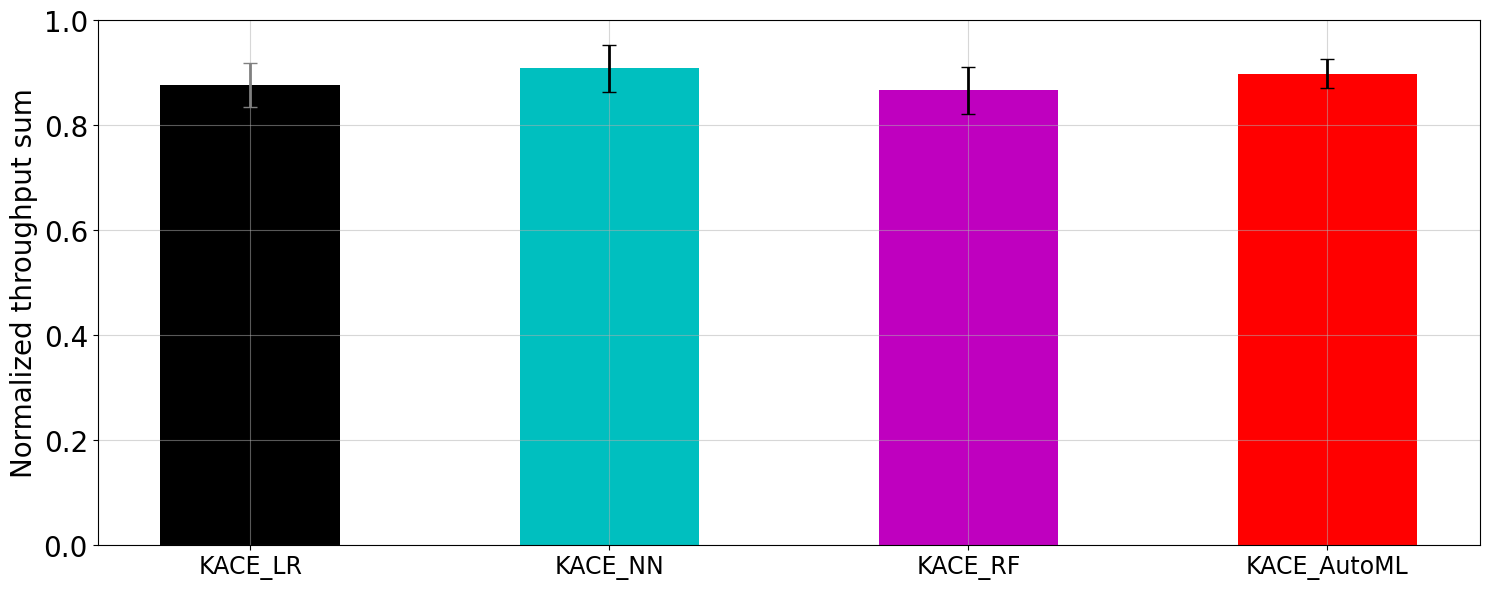

all models:  ['NN', 'RF', 'AutoML']
columns:  ['KACE', 'NN', 'RF', 'AutoML']
      random       sm%    memcap      mem%
0   0.393311  0.079021  1.000000  0.240061
1   0.665679  0.433004  0.871936  0.847551
2   0.450227  0.242904  0.693694  1.000000
3   0.644948  0.554255  0.719660  0.849248
4   0.554450  0.455639  0.706844  0.613077
5   0.518762  0.266464  0.603218  0.636757
6   0.697376  0.734194  1.000000  1.000000
7   0.453917  0.138661  0.957444  0.782934
8   0.600457  0.561689  0.916876  0.851881
9   0.328293  0.115128  1.000000  0.236696
10  0.848761  0.669725  0.875159  0.931998
11  0.551972  0.452455  0.612122  0.548135
12  0.540237  0.459648  0.753903  0.831214
13  0.477393  0.277888  0.579602  0.625117
14  0.695402  0.451134  0.914780  0.857560
15  0.435185  0.404408  0.571233  0.496379
16  0.580712  0.373372  0.726479  0.893740
17  0.468619  0.199773  0.708685  0.723645
18  0.560155  0.336952  0.258704  0.644966
19  0.426717  0.085022  0.931548  0.704482
20  0.421258  0.2345

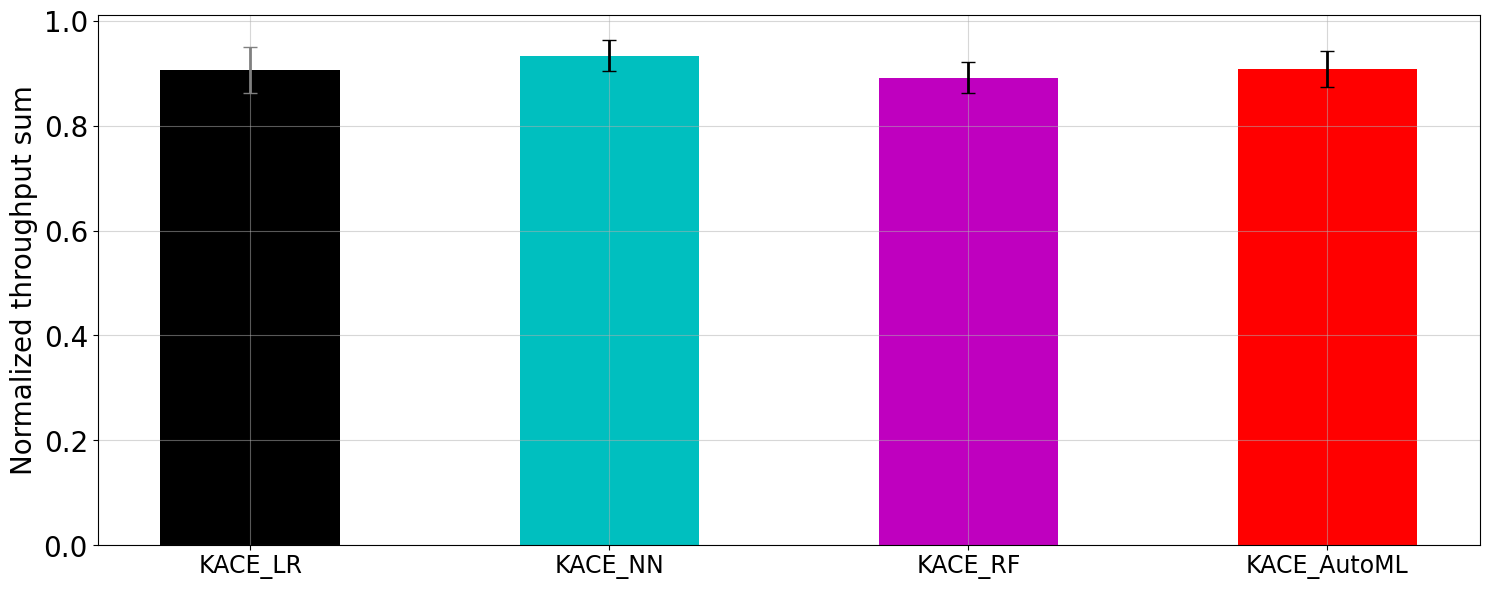

all models:  ['NN', 'RF', 'AutoML']
columns:  ['KACE', 'NN', 'RF', 'AutoML']
      random       sm%    memcap      mem%
0   0.363647  0.079021  1.000000  0.240061
1   0.643889  0.433004  0.871936  0.847551
2   0.458482  0.242904  0.693694  1.000000
3   0.621783  0.554255  0.719660  0.849248
4   0.509498  0.455639  0.706844  1.000000
5   0.530032  0.266464  0.603218  0.636757
6   0.719607  0.734194  1.000000  1.000000
7   0.417360  0.138661  0.957444  1.000000
8   0.626543  0.561689  0.916876  0.851881
9   0.347672  0.233602  1.000000  0.236696
10  0.844362  0.669725  0.957179  0.931998
11  0.552267  0.452455  0.612122  0.935397
12  0.543521  0.459648  0.753903  0.831214
13  0.483630  0.277888  0.579602  0.625117
14  0.720683  0.451134  0.914780  0.857560
15  0.668347  0.710001  1.000000  0.868962
16  0.580451  0.373372  0.726479  0.893740
17  0.461959  0.211009  0.748542  0.764343
18  0.641182  0.522434  0.401112  1.000000
19  0.454995  0.085022  0.931548  0.704482
20  0.452365  0.2345

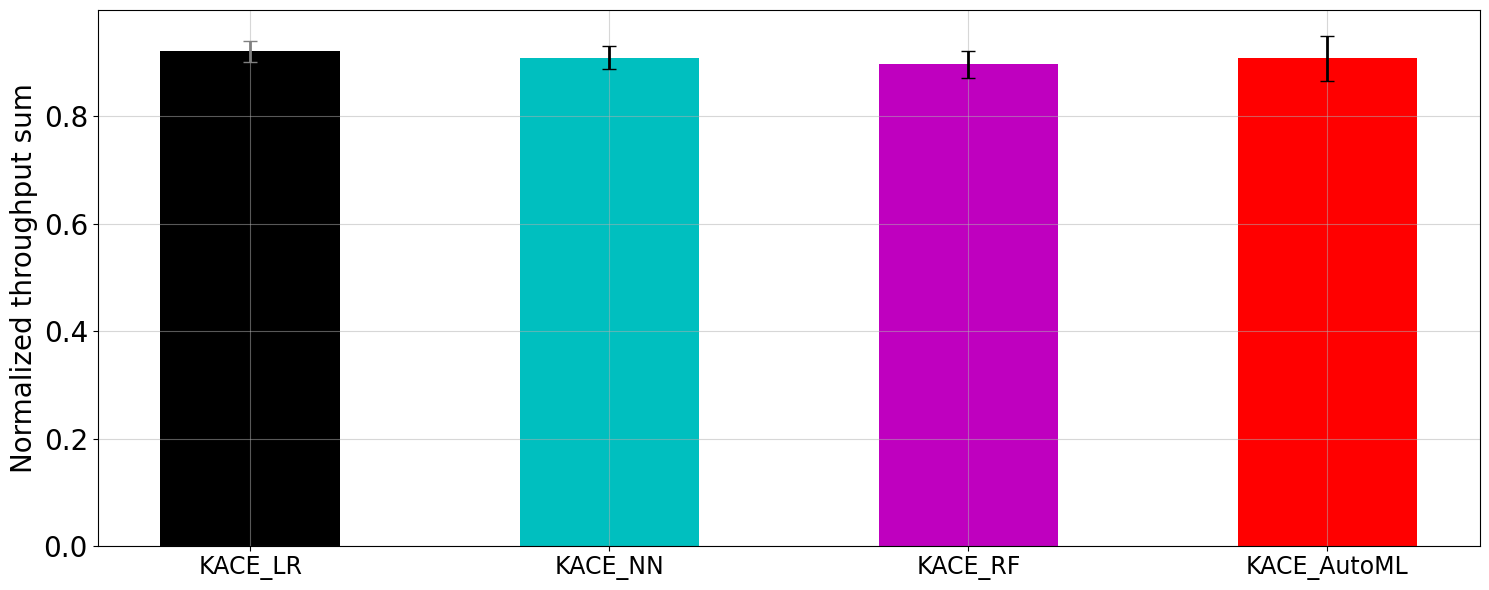

all models:  ['NN', 'RF', 'AutoML']
columns:  ['KACE', 'NN', 'RF', 'AutoML']
      random       sm%    memcap      mem%
0   0.381350  0.110489  0.189636  0.335658
1   0.622632  0.440876  0.887787  0.862958
2   0.499429  0.301108  0.693694  1.000000
3   0.638590  0.554255  0.719660  0.849248
4   0.509498  0.455639  0.706844  1.000000
5   0.542356  0.266464  0.603218  0.636757
6   0.719607  0.734194  1.000000  1.000000
7   0.429911  0.138661  0.957444  1.000000
8   0.602399  0.622532  0.944236  1.000000
9   0.350798  0.233602  1.000000  0.236696
10  0.879289  0.716579  0.957179  0.931998
11  0.593603  0.452455  0.612122  0.935397
12  0.535538  0.459648  0.753903  0.581728
13  0.462506  0.300461  0.626682  0.675894
14  0.702298  0.453439  0.919454  0.861941
15  0.668347  0.710001  1.000000  0.868962
16  0.589306  0.373372  0.726479  0.893740
17  0.444047  0.211009  1.000000  0.764343
18  0.883888  1.000000  0.767775  0.767775
19  0.470481  0.085022  0.931548  0.704482
20  0.418934  0.2345

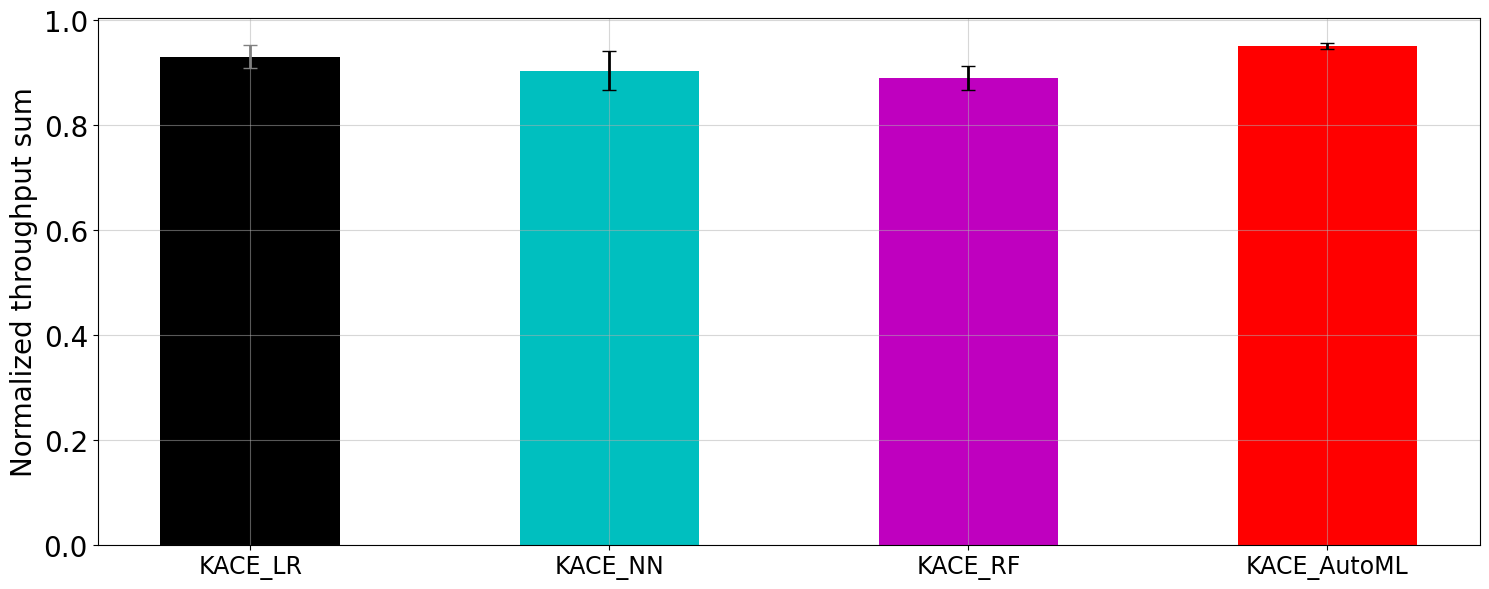

all models:  ['NN', 'RF', 'AutoML']
columns:  ['KACE', 'NN', 'RF', 'AutoML']
      random       sm%    memcap      mem%
0   0.381350  0.110489  0.189636  0.335658
1   0.640788  0.440876  0.887787  0.862958
2   0.519261  0.355816  0.693694  1.000000
3   0.713260  0.652642  0.847408  1.000000
4   0.509498  0.455639  0.706844  1.000000
5   0.582203  0.348218  0.603218  0.636757
6   0.719607  0.734194  1.000000  1.000000
7   0.460201  0.138661  0.957444  1.000000
8   0.553565  0.622532  0.622532  1.000000
9   0.379710  0.152265  1.000000  0.637143
10  0.866112  0.716579  0.957179  0.790690
11  0.586882  0.452455  0.612122  0.685254
12  0.559907  0.459648  0.931181  0.581728
13  0.513871  0.300461  0.626682  0.675894
14  0.709259  0.453439  0.919454  0.861941
15  0.663010  0.710001  1.000000  0.868962
16  0.589671  0.373372  0.726479  0.893740
17  0.472579  0.211009  1.000000  0.764343
18  0.487755  0.085022  0.931548  0.704482
19  0.432945  0.234594  1.000000  0.736765
['KACE', 'NN', 'RF',

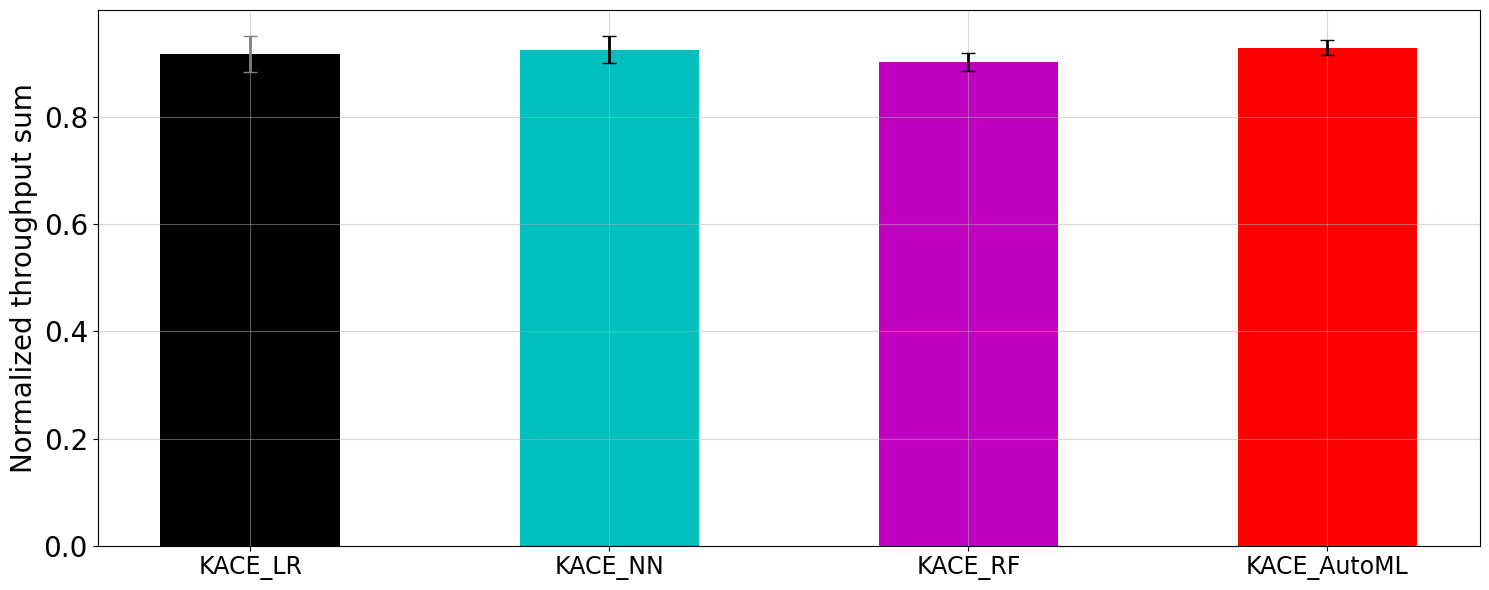

all models:  ['NN', 'RF', 'AutoML']
columns:  ['KACE', 'NN', 'RF', 'AutoML']
      random       sm%    memcap      mem%
0   0.415839  0.110489  0.189636  0.335658
1   0.641373  0.440876  0.862958  0.862958
2   0.559796  0.355816  0.693694  1.000000
3   0.719321  0.501114  0.847408  1.000000
4   0.555471  0.455639  0.706844  1.000000
5   0.582203  0.348218  0.603218  0.636757
6   0.719607  0.734194  1.000000  1.000000
7   0.478041  0.138661  0.957444  1.000000
8   0.553565  0.622532  0.622532  1.000000
9   0.369677  0.152265  1.000000  0.637143
10  0.891252  0.716579  0.957179  0.957179
11  0.636491  0.456080  0.612122  0.842549
12  0.567063  0.459648  0.931181  0.581728
13  0.524923  0.300461  0.626682  0.675894
14  0.709259  0.453439  0.919454  0.861941
15  0.637267  0.710001  1.000000  0.480260
16  0.608767  0.417763  0.812853  1.000000
17  0.502363  0.211009  1.000000  0.764343
18  0.443375  0.085022  0.704482  0.704482
19  0.399187  0.234594  1.000000  0.574059
['KACE', 'NN', 'RF',

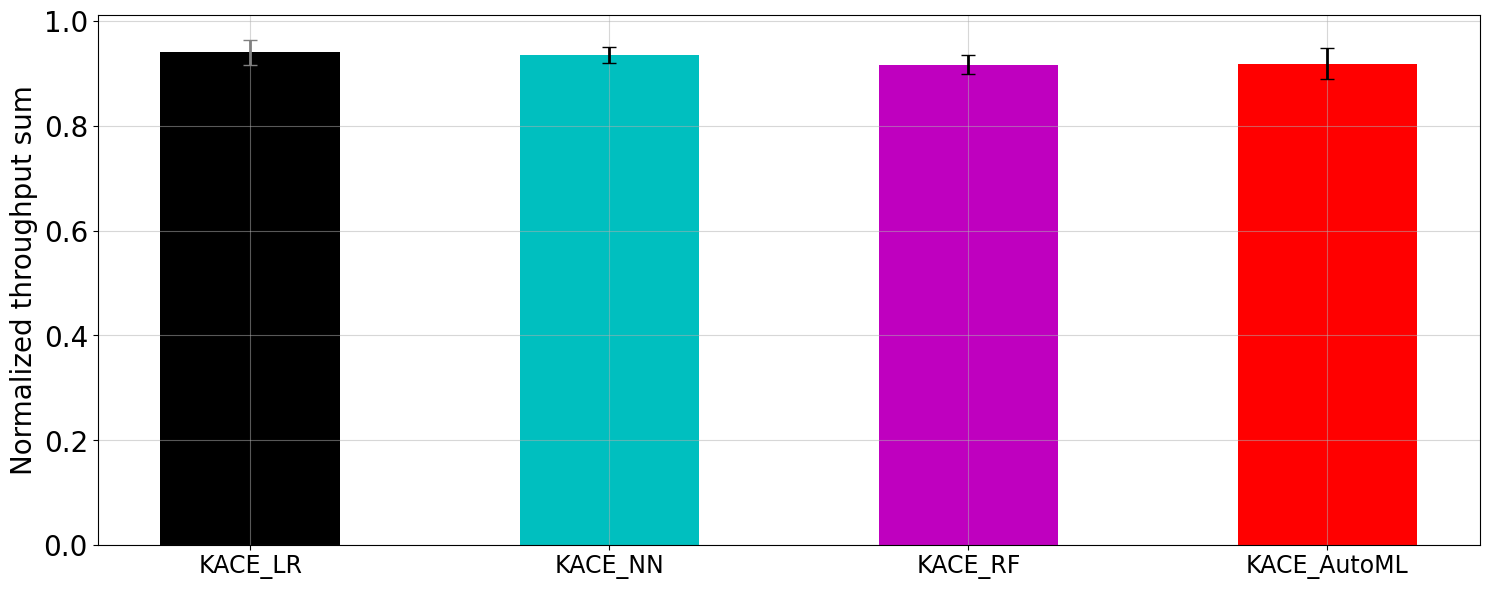

all models:  ['NN', 'RF', 'AutoML']
columns:  ['KACE', 'NN', 'RF', 'AutoML']
      random       sm%    memcap      mem%
0   0.524081  0.189636  0.189636  0.335658
1   0.625140  0.440876  0.565688  0.689655
2   0.585293  0.311401  0.693694  1.000000
3   0.719442  0.501114  0.847408  1.000000
4   0.536550  0.455639  0.540882  1.000000
5   0.551963  0.348218  0.603218  0.636757
6   0.722813  0.734194  1.000000  1.000000
7   0.512463  0.138661  0.957444  1.000000
8   0.553565  0.622532  0.622532  1.000000
9   0.369677  0.152265  1.000000  0.637143
10  0.858289  0.716579  1.000000  1.000000
11  0.636491  0.456080  0.612122  0.842549
12  0.567063  0.459648  0.931181  0.581728
13  0.605650  0.300461  0.626682  0.675894
14  0.765966  0.450569  1.000000  0.937448
15  0.627407  0.710001  1.000000  0.480260
16  0.601811  0.417763  0.812853  1.000000
17  0.471505  0.215867  0.781941  0.781941
18  0.459184  0.085022  1.000000  0.570714
19  0.324827  0.234594  1.000000  0.574059
['KACE', 'NN', 'RF',

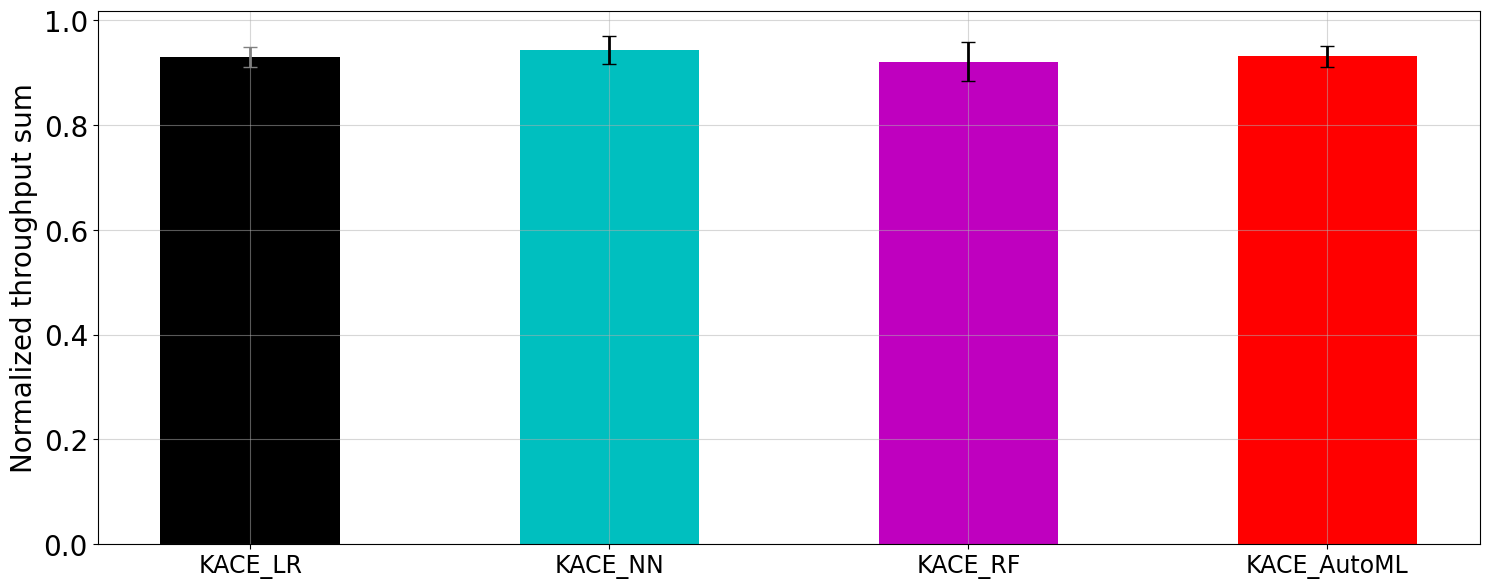

all models:  ['NN', 'RF', 'AutoML']
columns:  ['KACE', 'NN', 'RF', 'AutoML']
      random       sm%    memcap      mem%
0   0.635563  1.000000  0.335658  0.335658
1   0.625140  0.440876  0.565688  0.689655
2   0.656561  0.311401  0.693694  1.000000
3   0.764710  0.729905  0.847408  1.000000
4   0.548108  0.477413  0.540882  1.000000
5   0.534957  0.348218  0.818608  0.490362
6   0.714233  0.734194  1.000000  1.000000
7   0.605914  0.354596  0.957444  1.000000
8   0.553565  0.622532  0.622532  1.000000
9   0.380540  0.152265  1.000000  0.637143
10  0.633773  0.456080  0.612122  1.000000
11  0.567063  0.459648  0.931181  0.581728
12  0.595615  0.300461  0.626682  0.935097
13  0.888401  0.551889  1.000000  0.937448
14  0.683613  0.710001  1.000000  0.480260
15  0.624286  0.417763  0.812853  1.000000
16  0.490232  0.215867  0.781941  0.781941
17  0.492207  0.085022  1.000000  0.570714
18  0.397823  0.408658  0.246405  1.000000
['KACE', 'NN', 'RF', 'AutoML']
      random       sm%    memcap

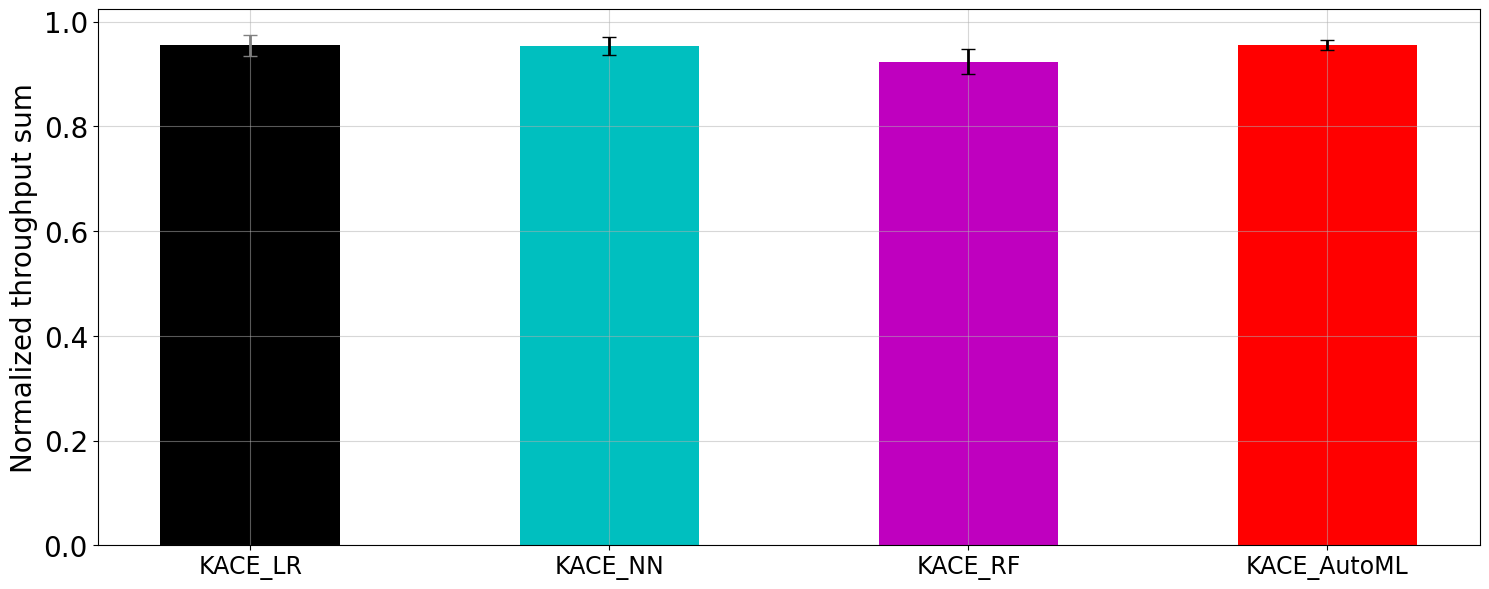

all models:  ['NN', 'RF', 'AutoML']
columns:  ['KACE', 'NN', 'RF', 'AutoML']
      random       sm%    memcap      mem%
0   0.635563  1.000000  0.335658  0.335658
1   0.625140  0.440876  0.565688  0.689655
2   0.609288  0.311401  0.693694  1.000000
3   0.771671  0.524492  0.847408  1.000000
4   0.548108  0.477413  0.540882  1.000000
5   0.534957  0.348218  0.818608  0.490362
6   0.785291  0.864913  1.000000  1.000000
7   0.978722  0.957444  0.957444  1.000000
8   0.553565  0.622532  0.622532  1.000000
9   0.426195  1.000000  1.000000  0.637143
10  0.633773  0.456080  0.612122  1.000000
11  0.567063  0.459648  0.931181  0.581728
12  0.595615  0.300461  0.626682  0.935097
13  0.978881  0.999193  1.000000  0.937448
14  0.875983  0.971086  1.000000  0.656864
15  0.663202  0.417763  0.812853  1.000000
16  0.469287  0.215867  1.000000  0.547613
17  0.492207  0.085022  1.000000  0.570714
18  0.437479  0.408658  0.246405  1.000000
['KACE', 'NN', 'RF', 'AutoML']
      random       sm%    memcap

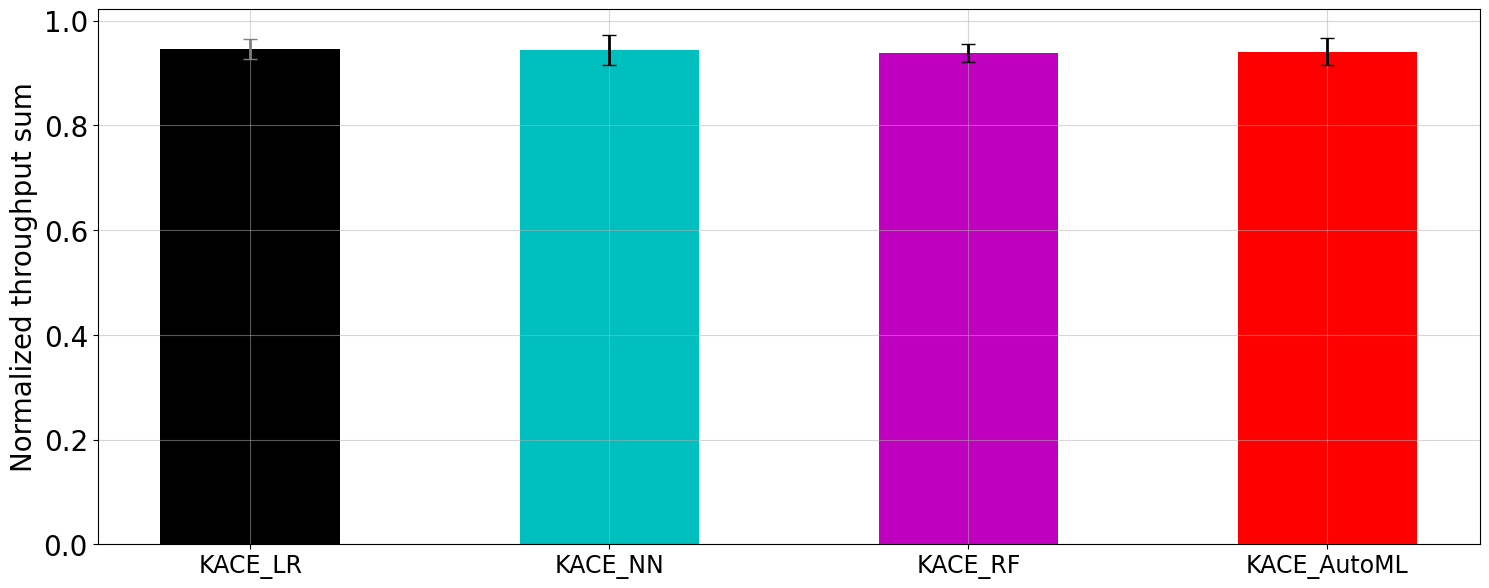

[{'KACE': 0.8764729681956128, 'NN': 0.9079872979721998, 'RF': 0.8660413479160539, 'AutoML': 0.89754443166591}, {'KACE': 0.906344775067164, 'NN': 0.9336419467676116, 'RF': 0.8915004673434078, 'AutoML': 0.9075482682216787}, {'KACE': 0.9209918054208368, 'NN': 0.9093008680904233, 'RF': 0.8970186982121913, 'AutoML': 0.9076796645319452}, {'KACE': 0.9304385118933292, 'NN': 0.9036662090452134, 'RF': 0.890198728515695, 'AutoML': 0.9513057940105121}, {'KACE': 0.916858410258115, 'NN': 0.9249605529876173, 'RF': 0.9016169110412801, 'AutoML': 0.9288170727346671}, {'KACE': 0.9396177770108667, 'NN': 0.934547819499717, 'RF': 0.9165235949238323, 'AutoML': 0.918470778904936}, {'KACE': 0.9297673998240971, 'NN': 0.9428697718474337, 'RF': 0.9205163272265763, 'AutoML': 0.931445003093922}, {'KACE': 0.9548016001767609, 'NN': 0.9543414479268216, 'RF': 0.923837775812328, 'AutoML': 0.9553979651810778}, {'KACE': 0.9463806058734315, 'NN': 0.9436038521292337, 'RF': 0.9373051197366216, 'AutoML': 0.9407940370340004}]


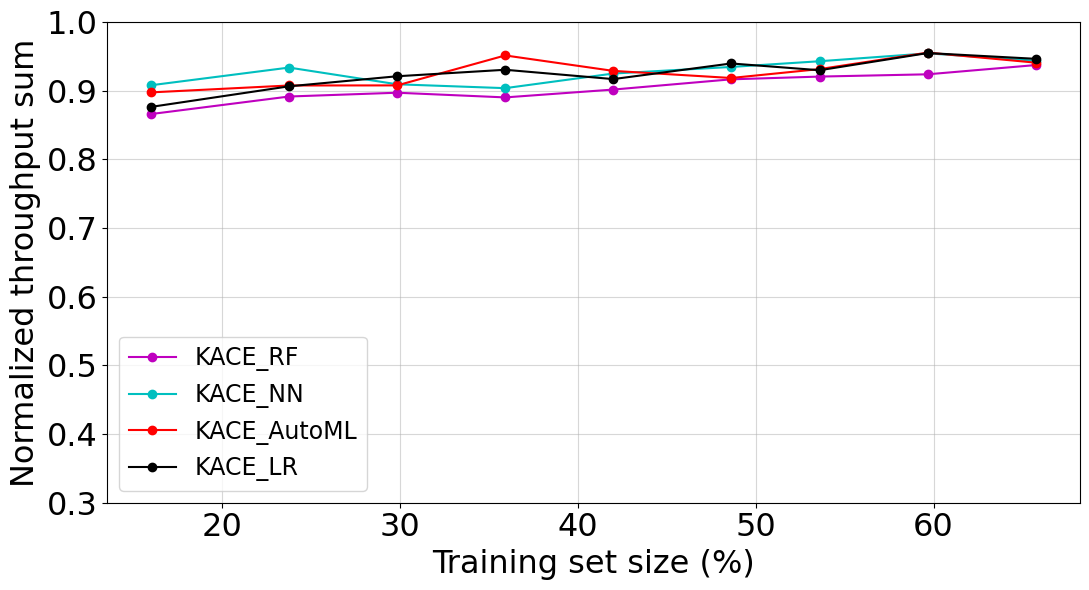

In [39]:
#plot average throughput of all
#plot 4 KACE models and its throuhgput gain
import pandas as pd

#get all runs in rand_run_nosharedmem folder
import os
import numpy as np


#for other testing purposes
#all_xput_models = [ "hotcloud"]
#cp_xput_keys = ['KACE', 'exclusive_throughput'] + all_xput_models
#cp_xput_keys = ['ground truth', 'KACE', 'hotcloud', 'best_rule_based_value', 'memcap', 'sm%','mem%', 'random', 'exclusive_throughput']


gain_with_all_training_occurances = []
train_occurrences= [i for i in range(2,11)]

for n_occur in train_occurrences:
    runs = []
    for rd in range(10,51,10):
        #runs.append(f"/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/mlProfiler/output/rand_run_nosharedmem/rand{i}/relative_throughput.csv")
        #runs.append(f"/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/mlsys/mlProfiler/output/run0709_KACE_hotcloud/n_occur_{n_occur}/rand{rd}")
        runs.append(f"../output/run0709_KACE_hotcloud/n_occur_{n_occur}/rand{rd}")
#plot average throughput of all

    mean_of_approaches = plot_average_throughput_multiple_runs(cp_xput_keys, runs, n_occur ,all_xput_models, key_color_dict)
    gain_with_all_training_occurances.append(mean_of_approaches.to_dict())

print(gain_with_all_training_occurances)
if 'hotcloud' in all_xput_models:
    pass
    #all baseline
    #plot_gain_all_occurences(gain_with_all_training_occurances, train_occurrences, key_color_dict, 
    #                     key_legend_order = None,
    #                    outname="Figure3: baselines_throughput_gain_vs_training_set_size")
else:
    #KACE only
    plot_gain_all_occurences(gain_with_all_training_occurances, train_occurrences, key_color_dict, 
                        key_legend_order = ['RF', 'NN', 'AutoML', 'KACE'],
                    outname="Figure3: KACEs_throughput_gain_vs_training_set_size")
    
    


      random       sm%    memcap      mem%
0   0.393311  0.079021  1.000000  0.240061
1   0.665679  0.433004  0.871936  0.847551
2   0.450227  0.242904  0.693694  1.000000
3   0.644948  0.554255  0.719660  0.849248
4   0.554450  0.455639  0.706844  0.613077
5   0.518762  0.266464  0.603218  0.636757
6   0.697376  0.734194  1.000000  1.000000
7   0.453917  0.138661  0.957444  0.782934
8   0.600457  0.561689  0.916876  0.851881
9   0.328293  0.115128  1.000000  0.236696
10  0.848761  0.669725  0.875159  0.931998
11  0.551972  0.452455  0.612122  0.548135
12  0.540237  0.459648  0.753903  0.831214
13  0.477393  0.277888  0.579602  0.625117
14  0.695402  0.451134  0.914780  0.857560
15  0.435185  0.404408  0.571233  0.496379
16  0.580712  0.373372  0.726479  0.893740
17  0.468619  0.199773  0.708685  0.723645
18  0.560155  0.336952  0.258704  0.644966
19  0.426717  0.085022  0.931548  0.704482
20  0.421258  0.234594  1.000000  0.820109
whisper-large-v2
vit-base-patch16-224
albert-base-v2
b

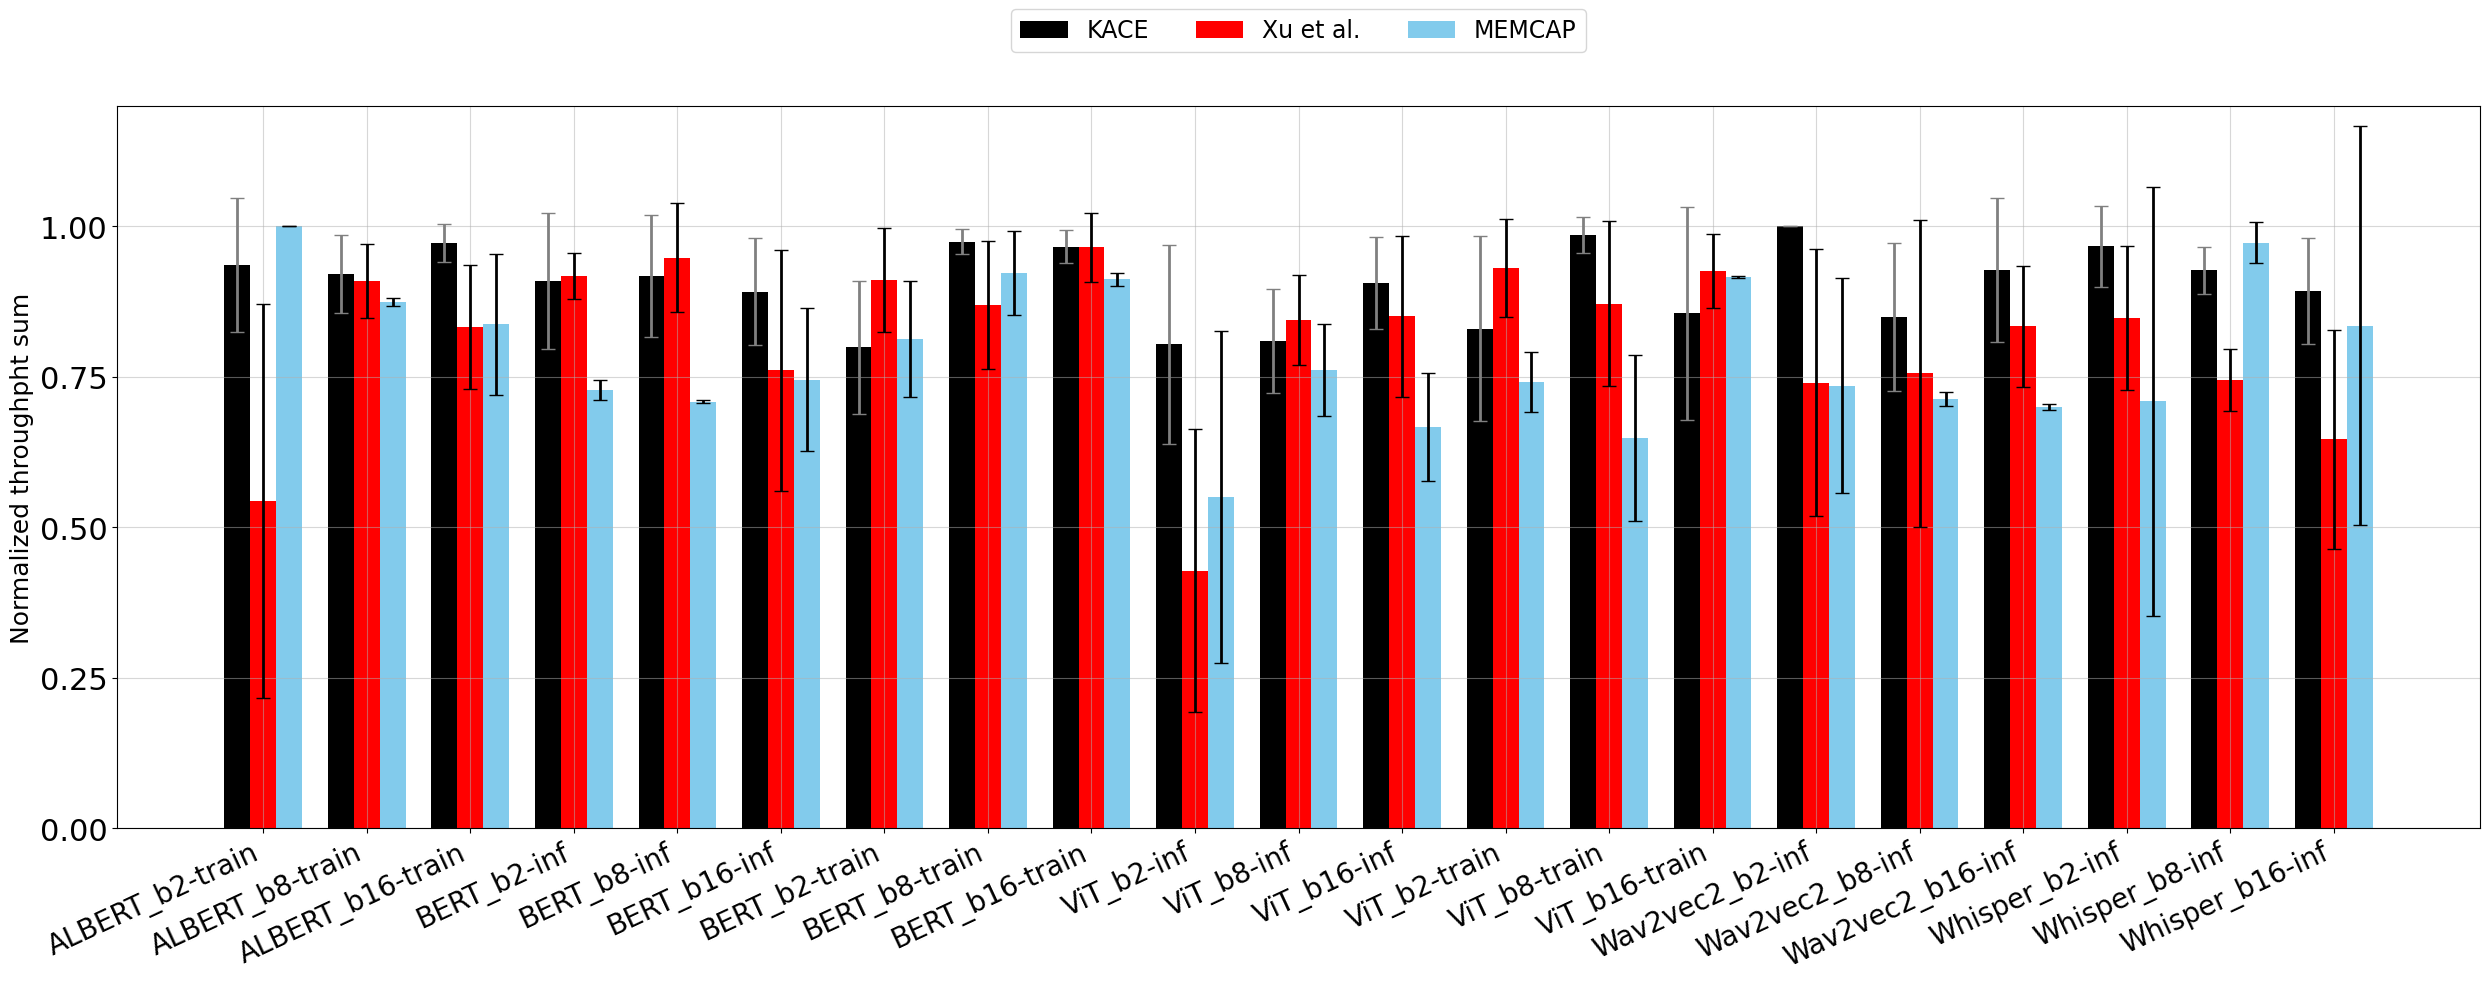

In [42]:
# Figure 5  - 21 workload breakdown
# 21 workload breakdown
# plot my_predicts
import  matplotlib.pyplot  as plt
import pandas as pd
axis_font = 22
legend_font = 17
label_font = 23

def get_different_workloads(dirname, cp_keys, w_models):
    df = pd.read_csv(dirname+"/KACE/predicts/relative_throughput.csv")
    df = df.rename(columns={"prediction": "KACE"})


    for model in w_models:
            
        #try to read the model. if not, skip
        try:
            #print(f"reading {model} in {run}")
            model_df = pd.read_csv(dirname+f"/{model}/predicts/relative_throughput.csv")
        except:
            print(f"model {model} not found in {dirname}")
            return
    
        #model_df = pd.read_csv(run+f"/{model}/predicts/relative_throughput.csv")
        df[f"{model}"] = model_df["prediction"]
    
            #df["hotcloud_RF"] = hotcloud_df
    
    find_best_rule_base(df)
    # Multiply every row by ground truth value
    #for col in columns:
    #    df[col] = df[col] * df['ground truth value']
    
    return df
    

w_models = ["hotcloud"]
#all_w_keys = ['ground truth', 'KACE', 'sm%','mem%', 'memcap', 'best_rule_based_value', 'random', 'hotcloud']
all_w_keys = [ 'KACE','hotcloud', 'memcap']
dfs = []
for i in range(10,51,10):
    eachdf = get_different_workloads(dirname=f"../output/run0709_KACE_hotcloud/n_occur_3/rand{i}", 
                            cp_keys=all_w_keys, w_models=w_models)
    if i==10:
        eachdf['HPworkload'] = eachdf['HPworkload'].apply(shorten_label)
        HP_workload = list(eachdf["HPworkload"])
        
        #create a HPworkload as dict of dict of list. second level of dict is the columns of eachdf excluding HPworkload. list is the value of each column
        #iterate throughunique_workload_types and create a dict of dict of list
        #sort HP_workload by the order of HP_workload
        HP_workload.sort()
        # Custom sort key
        # Custom sort key
        def custom_sort_key(s):
            prefix, suffix = s.split('_b')
            batch_size, job_type = suffix.split('-')
            batch_order = {"2": 0, "8": 1, "16": 2}
            job_order = {"inf": 0, "train": 1}
            return (prefix, job_order[job_type], batch_order[batch_size])
        # Sorting the list
        HP_workload = sorted(HP_workload, key=custom_sort_key)
        print(HP_workload)
        HP_workload_dict = {col: defaultdict(list) for col in HP_workload}
    #add every column to HP_workload_dict

    for col in all_w_keys:
        for i, workload in enumerate(HP_workload):
            HP_workload_dict[workload][col].append(eachdf[col][i])
    #get HP_workload and create
print(HP_workload_dict)
    
    #dfs.append(eachdf)
    

# Initialize lists to store means and stds
workload_types = list(HP_workload_dict.keys())
metrics = list(next(iter(HP_workload_dict.values())).keys())
means = defaultdict(lambda: defaultdict(list))
stds = defaultdict(lambda: defaultdict(list))

# Calculate mean and standard deviation for each workload type and metric
for workload, metric_dict in HP_workload_dict.items():
    for metric, values in metric_dict.items():
        mean = np.mean(values)
        std = np.std(values)
        means[workload][metric] = mean
        stds[workload][metric] = std

#save means to a csv
mean_df = pd.DataFrame(means)
mean_df.to_csv("21workload.csv")
# Plotting
fig, ax = plt.subplots(figsize=(25, 10))

# Bar positions
x_pos = np.arange(len(workload_types))

# Bar width
bar_width = 0.25


error_colors = {
    'ground truth': 'gray',
    'KACE': 'gray',  # Adjusted to be more noticeable on black bar
    'memcap': 'black', 
}
# Plot bars with error bars

    

label_dict = {'KACE': 'KACE', 'memcap': 'MEMCAP', 'hotcloud': 'Xu et al.', 'sm%':'SM%', 'mem%': 'MEM%'}

# Plot bars with error bars
for i, metric in enumerate(metrics):
    means_list = [means[workload][metric] for workload in workload_types]
    stds_list = [stds[workload][metric] for workload in workload_types]
    ax.bar(x_pos + i * bar_width, means_list, yerr=stds_list, capsize=5, width=bar_width, label=label_dict[metric], 
           color=key_color_dict[metric],
            error_kw=dict(ecolor=error_colors.get(metric, 'black'), lw=2))

# Customize labels and ticks
#ax.set_xlabel('Workload types', fontsize=label_font)
ax.set_ylabel('Normalized throughpht sum', fontsize=label_font-5)
#set y_tick font size
ax.tick_params(axis='y', labelsize=axis_font)

#set ylim to 1
ax.set_ylim(top=1.2)
ax.set_yticks(np.arange(0, 1.2, 0.25))
#ax.set_title('Mean Metric Values with Standard Deviation', fontsize=16)
ax.set_xticks(x_pos + bar_width)
ax.set_xticklabels(workload_types, rotation=25, ha='right', fontsize=axis_font-2)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3,fontsize=legend_font)

ax.grid(alpha=0.5)
# Show plot
plt.tight_layout()
#save to onedrive folder

plt.savefig(f"Figure5: 21workload_breakdown.png")
plt.show()


In [45]:
# plot my_predicts
import  matplotlib.pyplot  as plt
import pandas as pd
import json
axis_font = 22
legend_font = 17
label_font = 23
batch_size = 16
workloads = [
    'whisper-large-v2_batch16-inf', 'whisper-large-v2_batch8-inf', 
    'whisper-large-v2_batch2-inf', 'bert-base-cased_batch16-inf',
    'bert-base-cased_batch8-inf', 'vit-base-patch16-224_batch8-inf',
    'vit-base-patch16-224_batch2-inf', 'vit-base-patch16-224_batch16-inf',
    'wav2vec2-base-960h_batch2-inf', 'wav2vec2-base-960h_batch16-inf',
    'wav2vec2-base-960h_batch8-inf', 'bert-base-cased_batch2-inf',
    'vit_h_14_batch8-train', 'vit_h_14_batch16-train',
    'bert-base-cased_batch16-train', 'bert-base-cased_batch8-train',
    'vit_h_14_batch2-train', 'albert-base-v2_batch2-train',
    'albert-base-v2_batch8-train', 'albert-base-v2_batch16-train',
    'bert-base-cased_batch2-train'
]
def filter_workloads(workloads, batch_size):
    return [workload for workload in workloads if f'batch{batch_size}' in workload]

workloads = filter_workloads(workloads, f"{batch_size}")
print(workloads)
# Custom sort key
def custom_sort_key(s):
    prefix, suffix = s.split('_batch')
    batch_size, job_type = suffix.split('-')
    batch_order = {"2": 0, "8": 1, "16": 2}
    job_order = {"inf": 0, "train": 1}
    return (prefix, job_order[job_type], batch_order[batch_size])

# Sorting the list
workloads = sorted(workloads, key=custom_sort_key)
dirname="..//output/partition_exp/n_occur_0/rand10"
cp_keys = ['KACE', 'hotcloud', 'sm%','mem%', 'memcap', 'random']
pred_models = ["KACE", 'hotcloud']
#pred_models = ["KACE"]
import os
from collections import defaultdict
def read_and_parse_json(file_path):
    # Check if the file exists and is not empty
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file {file_path} does not exist.")
    
    if os.path.getsize(file_path) == 0:
        raise ValueError(f"The file {file_path} is empty.")
    
    # Read the JSON data from the file
    with open(file_path, 'r') as file:
        try:
            data = json.load(file)
        except json.JSONDecodeError as e:
            raise ValueError(f"Error decoding JSON: {e}")
    
    return data
def get_unseen_workloads(dirname, cp_keys, pred_models):
    #read json file - /Users/bing/Documents/mlProfiler/output/partition_exp/n_occur_0/rand10/KACE/albert-base-v2_batch2-train/predicts/HP-albert-base-v2_batch2-train_MPS100.json
    #get HPworkload and store it somewhere
    #read json
   
    # Parse the JSON data
    #data = json.loads(json_data)
    total_dict = defaultdict(lambda: defaultdict())
    # Function to extract specific values
    def extract_values(data):
        data = read_and_parse_json(data)
        
        return data["workload1+workload2"]

    for model in pred_models:
        for wd in workloads:
            sum_dict = extract_values(dirname+f"/{model}/{wd}/predicts/HP-{wd}_MPS100.json")
            #print(sum_dict)
            #add data 
            #print(sum_dict)
            baseline = sum_dict['Best shared with 100-100% MPS thread%']
            for key, value in sum_dict.items():
                if key != 'Best shared with 100-100% MPS thread%':
                    #normalize
                    normed_throughput = value/baseline
                if key == 'stage1-shared 100-100% throughput of predicted pairs':
                    total_dict[model][wd] = normed_throughput
                else:
                    if model != "hotcloud":
                        if key in cp_keys:
                            total_dict[key][wd] = normed_throughput

    return total_dict 
kace_dict = get_unseen_workloads(dirname, cp_keys, pred_models)
print(kace_dict)

#remove all worj
#
#kace_dict = {k: v for k, v in kace_dict.items() if k in cp_keys}


['whisper-large-v2_batch16-inf', 'bert-base-cased_batch16-inf', 'vit-base-patch16-224_batch16-inf', 'wav2vec2-base-960h_batch16-inf', 'vit_h_14_batch16-train', 'bert-base-cased_batch16-train', 'albert-base-v2_batch16-train']
defaultdict(<function get_unseen_workloads.<locals>.<lambda> at 0x7f1003eaca40>, {'KACE': defaultdict(None, {'albert-base-v2_batch16-train': 0.9353966800994905, 'bert-base-cased_batch16-inf': 1.0, 'bert-base-cased_batch16-train': 1.0, 'vit-base-patch16-224_batch16-inf': 0.8823843317812649, 'vit_h_14_batch16-train': 1.0, 'wav2vec2-base-960h_batch16-inf': 1.0, 'whisper-large-v2_batch16-inf': 0.6371425351187133}), 'sm%': defaultdict(None, {'albert-base-v2_batch16-train': 0.37005402136749815, 'bert-base-cased_batch16-inf': 0.6182396137378569, 'bert-base-cased_batch16-train': 0.32613198243219127, 'vit-base-patch16-224_batch16-inf': 0.48945445739378673, 'vit_h_14_batch16-train': 0.3125775145247147, 'wav2vec2-base-960h_batch16-inf': 0.5180715029732726, 'whisper-large-v2_b

albert-base-v2
bert-base-cased
bert-base-cased
vit-base-patch16-224
vit_h_14
wav2vec2-base-960h
whisper-large-v2
albert-base-v2
bert-base-cased
bert-base-cased
vit-base-patch16-224
vit_h_14
wav2vec2-base-960h
whisper-large-v2
albert-base-v2
bert-base-cased
bert-base-cased
vit-base-patch16-224
vit_h_14
wav2vec2-base-960h
whisper-large-v2
albert-base-v2
bert-base-cased
bert-base-cased
vit-base-patch16-224
vit_h_14
wav2vec2-base-960h
whisper-large-v2
albert-base-v2
bert-base-cased
bert-base-cased
vit-base-patch16-224
vit_h_14
wav2vec2-base-960h
whisper-large-v2


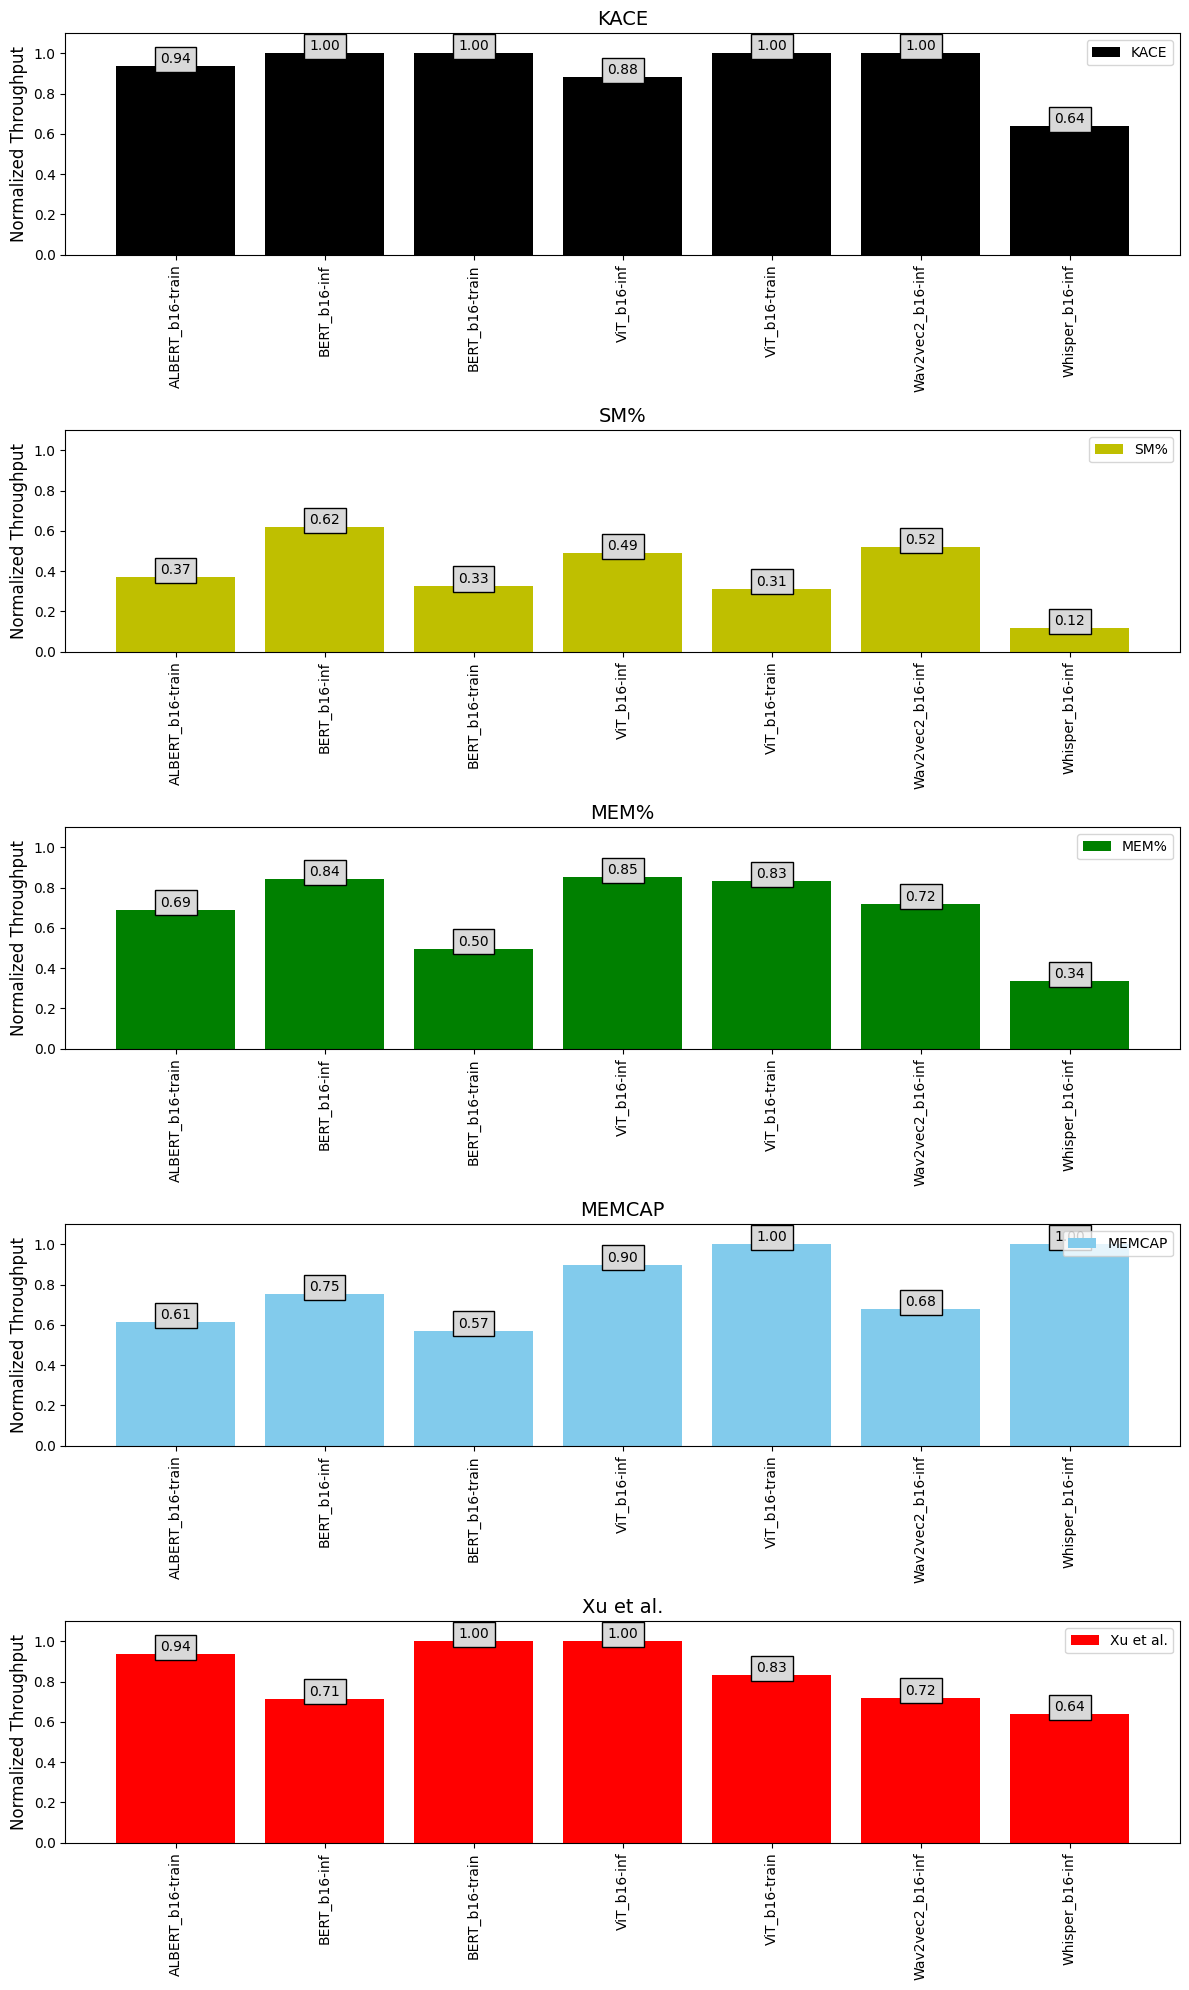

/tmp/ipykernel_21889/2340905202.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([cp_label_model_dict.get(group, group) for group in groups], rotation=0, fontsize=axis_font-2)


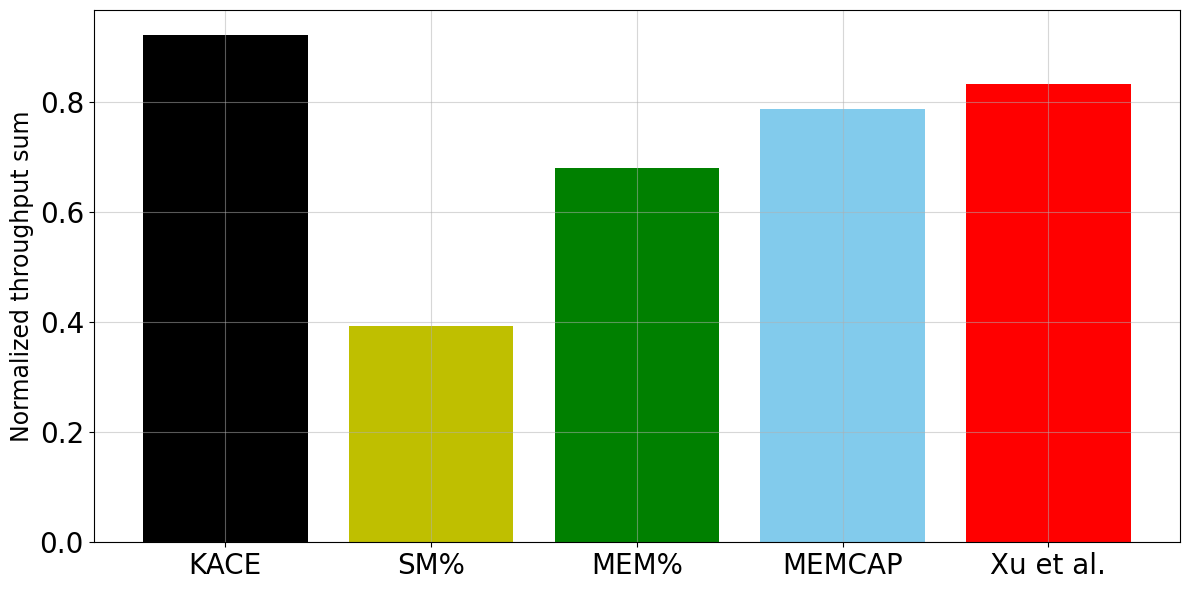

In [47]:
import numpy as np

#copy label_model_dict
cp_label_model_dict = label_model_dict.copy()
cp_label_model_dict['KACE'] = 'KACE'
def plot_grouped_barcharts(data):
    num_groups = len(data)
    fig, axs = plt.subplots(num_groups, 1, figsize=(12, num_groups * 4))
    #copy label_model_dict
    
    if num_groups == 1:
        axs = [axs]
    #make a copy of data, with batch 2 workloads only
    for i, (group, workloads) in enumerate(data.items()):
        index = np.arange(len(workloads))
        values = list(workloads.values())
        workload_labels = [shorten_label(workload) for workload in workloads.keys()]

        # Bar chart
        bars = axs[i].bar(index, values, color=key_color_dict.get(group, 'b'))

        # Add text labels
        for bar in bars:
            height = bar.get_height()
            axs[i].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='0.85'))

        # Labels and title
        #axs[i].set_xlabel('Workloads', fontsize=12)
        axs[i].set_ylabel('Normalized Throughput', fontsize=12)
        axs[i].set_ylim(0, 1.1)
        axs[i].set_title(cp_label_model_dict.get(group, group), fontsize=14)
        axs[i].set_xticks(index)
        axs[i].set_xticklabels(workload_labels, rotation=90, fontsize=10)
        axs[i].legend([cp_label_model_dict.get(group, group)], loc='upper right')
        

    plt.tight_layout()
    plt.show()

def plot_average_throughput(data):
    groups = list(data.keys())
    averages = [np.mean(list(data[group].values())) for group in groups]

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(groups, averages, color=[key_color_dict.get(group, 'b') for group in groups])

    # Add text labels
    for bar in bars:
        height = bar.get_height()
        #ax.text(bar.get_x() + bar.get_width() / 2.0, 0.15, f'Gain:\n{height*100:.1f}%', ha='center', va='bottom', fontsize=legend_font, bbox=dict(facecolor='0.85'))

    # Labels and title
    ax.set_ylabel('Normalized throughput sum', fontsize=axis_font-5)
    #ax.set_yticklabels()
    ax.tick_params(axis='y', labelsize=axis_font-2)
    #ax.set_yticklabels(ax.get_yticks(), fontsize=axis_font-2)
    #ax.set_title(f'Average Throughput for batch{batch_size}', fontsize=14)
    #ax.set_yticklabels(fontsize=axis_font-2)
    ax.set_xticklabels([cp_label_model_dict.get(group, group) for group in groups], rotation=0, fontsize=axis_font-2)
    ax.grid(alpha=0.5)
    plt.tight_layout()
    #plt.savefig(f"/Users/bing/Library/CloudStorage/OneDrive-StonyBrookUniversity/SBU/writings/paper/figure/average_throughput_batch{batch_size}.png")
    plt.savefig(f"unseen_batch{batch_size}.png")
    plt.show()


plot_grouped_barcharts(kace_dict)
plot_average_throughput(kace_dict)